In [ ]:
import numpy as np
import  matplotlib.pyplot as plt
import pandas as pd
df = pd.read_excel('Data_Train.xlsx')

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
37h 10m      1
31h 50m      1
35h 20m      1
5m           1
35h 35m      1
Name: Duration, Length: 368, dtype: int64

In [ ]:
df.isnull().sum()
df.dropna(inplace=True)

In [ ]:
df['day']=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day

In [ ]:
df['month']=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.month


In [ ]:
df.drop(["Date_of_Journey"],inplace=True,axis=1)

In [ ]:

df['dep_hour']=pd.to_datetime(df.Dep_Time).dt.hour

df["dep_min"]=pd.to_datetime(df.Dep_Time).dt.minute
df.drop(['Dep_Time'],inplace=True,axis=1)


In [ ]:
df['arr_hour']=pd.to_datetime(df.Arrival_Time).dt.hour
df['arr_min']=pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(['Arrival_Time'],inplace=True,axis=1)


In [ ]:
df.shape

(10682, 14)

In [ ]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:

i1 = df[df['Airline'] == 'Trujet'].index
df.drop(i1 , inplace=True)
i2 = df[df['Airline'] == 'Multiple carriers Premium economy'].index
df.drop(i2 , inplace=True)
i3 = df[df['Airline'] == 'Jet Airways Business'].index
df.drop(i3 , inplace=True)
i4 = df[df['Airline'] == 'Vistara Premium economy'].index
df.drop(i4 , inplace=True)
i4 = df[df['Airline'] == 'Vistara'].index
df.drop(i4 , inplace=True)
i5 = df[df['Airline'] == 'Air Asia'].index
df.drop(i5 , inplace=True)
i6 = df[df['Airline'] == 'GoAir'].index
df.drop(i6 , inplace=True)


In [ ]:
df.shape

(9667, 14)

In [ ]:


dur=list(df['Duration'])
dur_hour=[]
dur_min=[]

for i in range(len(dur)):
    for j in range(len(dur[i])):
        if dur[i][j]=="h":
            t=dur[i].index("h")
            dur_hour.append(int(dur[i][0:t]))
dur_hour.append(int("1"))
df["Duration_hours"] = dur_hour
df.head()
        


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,dep_hour,dep_min,arr_hour,arr_min,Duration_hours
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4


In [ ]:
df['Destination'].value_counts()

Cochin       4320
Banglore     2513
Delhi         993
New Delhi     831
Hyderabad     673
Kolkata       337
Name: Destination, dtype: int64

In [ ]:
df["Destination"].replace({"New Delhi": "Delhi"}, inplace=True)

In [ ]:


dur=list(df['Duration'])
k="m"
dur_min=[]

for i in range(len(dur)):
    for j in range(len(dur[i])):
        if dur[i][j]=="h" and dur[i][j]!=" ":
            
             t=dur[i].index("h")
             dur_min.append(dur[i][t+2:-1])
dur_min.append("1")
df["Duration_min"] = dur_min
df.head()
               

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,dep_hour,dep_min,arr_hour,arr_min,Duration_hours,Duration_min
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [ ]:
df["Duration_min"].replace({"": int("0")}, inplace=True)

In [ ]:
df['Destination'].value_counts()

Cochin       4320
Banglore     2513
Delhi        1824
Hyderabad     673
Kolkata       337
Name: Destination, dtype: int64

In [ ]:
df['Duration_min'] = df['Duration_min'].astype(int)

In [ ]:
df.drop(['Duration'],inplace=True,axis=1)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day,month,dep_hour,dep_min,arr_hour,arr_min,Duration_hours,Duration_min
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [ ]:
air=df[['Airline']]
air=pd.get_dummies(air)
air.head()


,Airline_Air India,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet
0,0,1,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [ ]:
air.shape

(9667, 5)

In [ ]:
region=df[['Source']]
region=pd.get_dummies(region)
region.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [ ]:
df['Destination'].value_counts()

Cochin       4320
Banglore     2513
Delhi        1824
Hyderabad     673
Kolkata       337
Name: Destination, dtype: int64

In [ ]:
dest=df[['Destination']]
dest=pd.get_dummies(dest)
dest.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,0,1,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0


In [ ]:
dest.shape

(9667, 5)

In [ ]:
df['Additional_Info'].value_counts()

No info                         7333
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
No Info                            3
Business class                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [ ]:
df['Route'].value_counts()

DEL → BOM → COK                      2314
BLR → DEL                            1196
CCU → BOM → BLR                       970
CCU → BLR                             629
BOM → HYD                             621
                                     ... 
BOM → CCU → HYD                         1
BOM → JAI → DEL → HYD                   1
BLR → CCU → BBI → HYD → VGA → DEL       1
BLR → BOM → IXC → DEL                   1
BLR → HBX → BOM → BHO → DEL             1
Name: Route, Length: 126, dtype: int64

In [ ]:
df['Total_Stops'].value_counts()

1 stop      5161
non-stop    2951
2 stops     1509
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
df.drop(['Route','Additional_Info'],inplace=True,axis=1)


In [ ]:
df['Destination'].value_counts()

Cochin       4320
Banglore     2513
Delhi        1824
Hyderabad     673
Kolkata       337
Name: Destination, dtype: int64

In [ ]:
df.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,'4 stops':4},inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,day,month,dep_hour,dep_min,arr_hour,arr_min,Duration_hours,Duration_min
0,IndiGo,Banglore,Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1,13302,1,3,16,50,21,35,4,45


In [ ]:
dff=pd.concat([df,air,region,dest],axis=1)
dff.head()

,Airline,Source,Destination,Total_Stops,Price,day,month,dep_hour,dep_min,arr_hour,arr_min,Duration_hours,Duration_min,Airline_Air India,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,IndiGo,Banglore,Delhi,0,3897,24,3,22,20,1,10,2,50,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,IndiGo,Banglore,Delhi,1,13302,1,3,16,50,21,35,4,45,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
dff.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)



In [ ]:
dff.head()

,Total_Stops,Price,day,month,dep_hour,dep_min,arr_hour,arr_min,Duration_hours,Duration_min,Airline_Air India,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
y=dff.columns
print(y)

Index(['Total_Stops', 'Price', 'day', 'month', 'dep_hour', 'dep_min',
       'arr_hour', 'arr_min', 'Duration_hours', 'Duration_min',
       'Airline_Air India', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Multiple carriers', 'Airline_SpiceJet', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata'],
      dtype='object')


In [ ]:
df['Destination'].value_counts()

Cochin       4320
Banglore     2513
Delhi        1824
Hyderabad     673
Kolkata       337
Name: Destination, dtype: int64

In [ ]:
print(len(y))

25


In [ ]:
x=dff.loc[:,['Total_Stops', 'day', 'month', 'dep_hour', 'dep_min',
       'arr_hour', 'arr_min', 'Duration_hours', 'Duration_min',
       'Airline_Air India', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Multiple carriers', 'Airline_SpiceJet', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata']]

In [ ]:
x.head()

,Total_Stops,day,month,dep_hour,dep_min,arr_hour,arr_min,Duration_hours,Duration_min,Airline_Air India,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,22,20,1,10,2,50,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,1,12,5,18,5,23,30,5,25,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
y=dff.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

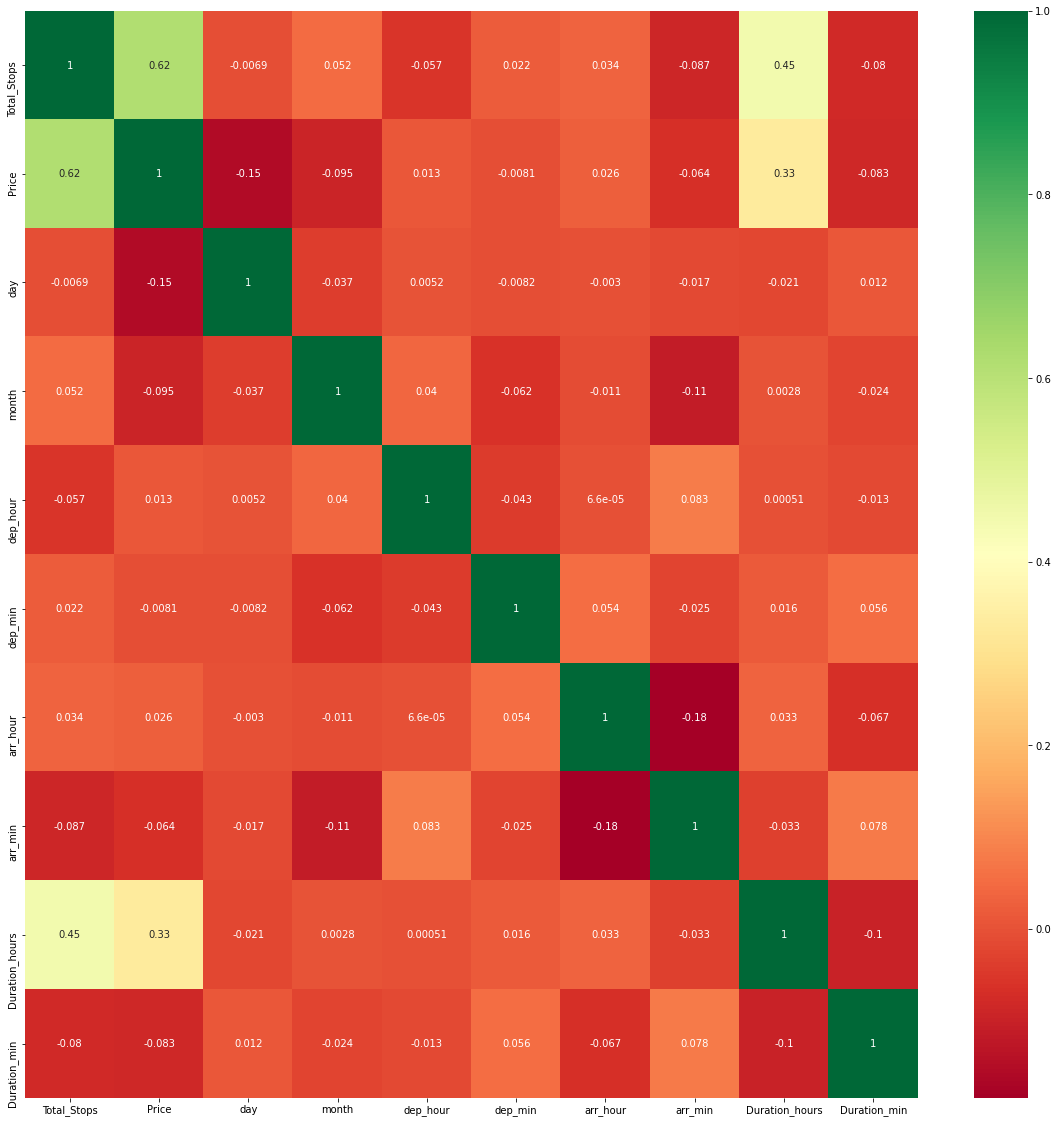

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=200)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(x_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9667 entries, 0 to 10682
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Total_Stops                9667 non-null   int64
 1   day                        9667 non-null   int64
 2   month                      9667 non-null   int64
 3   dep_hour                   9667 non-null   int64
 4   dep_min                    9667 non-null   int64
 5   arr_hour                   9667 non-null   int64
 6   arr_min                    9667 non-null   int64
 7   Duration_hours             9667 non-null   int64
 8   Duration_min               9667 non-null   int64
 9   Airline_Air India          9667 non-null   uint8
 10  Airline_IndiGo             9667 non-null   uint8
 11  Airline_Jet Airways        9667 non-null   uint8
 12  Airline_Multiple carriers  9667 non-null   uint8
 13  Airline_SpiceJet           9667 non-null   uint8
 14  Source_Banglore        

In [ ]:
y_pred=reg.predict(x_test)

In [ ]:
reg.score(x_train,y_train)

0.9671728856864211

In [ ]:
reg.score(x_test,y_test)

0.815975363901986

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


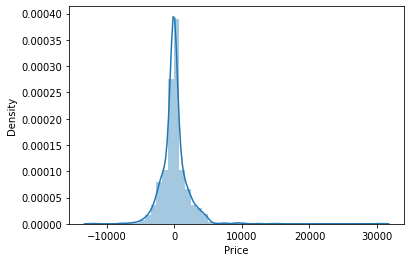

In [ ]:
sns.distplot(y_test-y_pred)
plt.show()

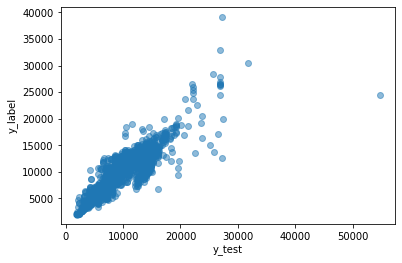

In [ ]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_label")
plt.show()

In [ ]:
from sklearn import metrics
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("MAE",metrics.mean_absolute_error(y_test,y_pred))
print("R2 SCORE",metrics.r2_score(y_test,y_pred))

RMSE 1970.9066956324355
MSE 3884473.202888766
MAE 1196.2366592800513
R2 SCORE 0.815975363901986


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,30,100]
min_samples_leaf=[1,2,5,10]

In [ ]:
grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
rf_random = RandomizedSearchCV(estimator = reg, param_distributions =grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   6.3s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s remaining:    0.0s


[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   6.2s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   6.1s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   6.2s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   6.1s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=10, total=  10.6s
[CV] n_estimators=900, min_samples_split=100, 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 300}

In [ ]:
predicted_Value=rf_random.predict(x_test)

In [ ]:

metrics.r2_score(y_test, predicted_Value)

0.8318031798668565

In [ ]:
rf_random.score(x_test,y_test)

-3550372.680918175

In [ ]:
rf_random.score(x_train,y_train)

-1541696.2726346161

In [ ]:
import pickle
file=open("airfare.pkl",'wb')
pickle.dump(rf_random,file)

In [ ]:
model=open("airfare.pkl",'rb')
air=pickle.load(model)


In [ ]:
final_value=air.predict(x_test)
metrics.r2_score(y_test,final_value)

0.8318031798668565

In [ ]:
final_value[0]

9342.57421030585

In [ ]:

x=list(y_test)
print(x[0])

9134


In [ ]:
b=x_train

In [ ]:
u=np.array(x_train)

print(u[9])

[ 0  1  5 18 55 22  0  3  5  0  0  1  0  0  1  0  0  0  0  0  0  1  0  0]


In [ ]:
 o=b.columns
 len(o)


24

Cochin       4320
Banglore     2513
Delhi        1824
Hyderabad     673
Kolkata       337
Name: Destination, dtype: int64